In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense

Data Set Up

In [ ]:
df = pd.read_csv('cleanedtraining.csv')
labelencoder = LabelEncoder()
df['category'] = labelencoder.fit_transform(df['category'])


In [ ]:
features = ['amt', 'category', 'unix_time', 'merch_lat', 'merch_long']
X= df[features]
y = df['is_fraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(6, activation = 'relu', input_dim = (5)))
classifier.add(Dense( 6, activation = 'relu'))
classifier.add(Dense( 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 36        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = classifier.fit(X_train, y_train, batch_size = 15, epochs = 10)

Epoch 1/10
69156/69156 [==============================] - 113s 2ms/step - loss: 0.0219 - accuracy: 0.9942
Epoch 2/10
69156/69156 [==============================] - 109s 2ms/step - loss: 0.0161 - accuracy: 0.9953
Epoch 3/10
69156/69156 [==============================] - 107s 2ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 4/10
69156/69156 [==============================] - 107s 2ms/step - loss: 0.0139 - accuracy: 0.9957
Epoch 5/10
69156/69156 [==============================] - 107s 2ms/step - loss: 0.0134 - accuracy: 0.9960
Epoch 6/10
69156/69156 [==============================] - 113s 2ms/step - loss: 0.0131 - accuracy: 0.9961
Epoch 7/10
69156/69156 [==============================] - 109s 2ms/step - loss: 0.0128 - accuracy: 0.9962
Epoch 8/10
69156/69156 [==============================] - 109s 2ms/step - loss: 0.0126 - accuracy: 0.9963
Epoch 9/10
69156/69156 [==============================] - 103s 1ms/step - loss: 0.0125 - accuracy: 0.9963
Epoch 10/10
69156/69156 [=====================

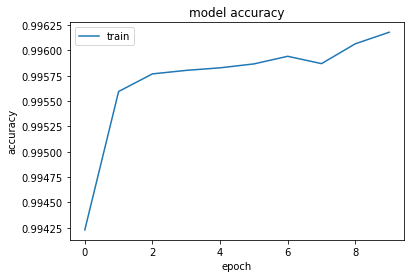

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
labels = ['Fraud', 'Not Fraud']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()
accuracy_score(y_test,y_pred)

NameError: ignored

In [ ]:
df2 = pd.read_csv('fraud_data_test_cleaned.csv')
features = ['amt', 'category', 'unix_time', 'merch_lat', 'merch_long']
Xtest= df2[features]
Ytest= df2['is_fraud']
y_pred = classifier.predict(Xtest)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(Ytest, y_pred)
print(cm)
accuracy_score(Ytest,y_pred)

13179/13179 [==============================] - 36s 3ms/step
[[419822      0]
 [  1896      0]]


0.9955041046386448